# Importação de bibliotecas e dos dados


In [1]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [60]:
df = pd.read_csv('risco.csv')

# Análise Exploratória

In [61]:
df.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [63]:
df.shape

(150, 6)

In [64]:
#Estatísticas descritivas das variáveis numéricas

df.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [65]:
# Tabela de Frequência da Variável "risco" - Nossa Classe ou Label ou Target

df['Risco'].value_counts()

Risco_Alto     50
Risco_Medio    50
Risco_Baixo    50
Name: Risco, dtype: int64

<Axes: xlabel='Risco', ylabel='count'>

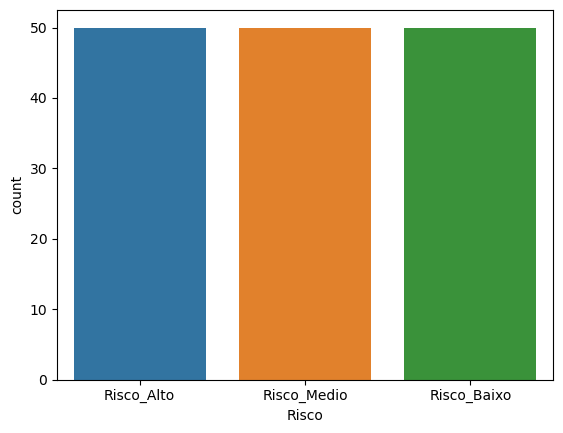

In [66]:
# Cria um gráfico de barras da variável Target
sns.countplot(data=df, x=df['Risco'])

In [67]:
# Missing values
df.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [68]:
#Eliminar a coluna de identificação,
df = df.drop(columns='id_cliente').copy()

In [69]:
#Printa o dataset na tela
df

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Risco_Baixo
146,6.3,2.5,5.0,1.9,Risco_Baixo
147,6.5,3.0,5.2,2.0,Risco_Baixo
148,6.2,3.4,5.4,2.3,Risco_Baixo


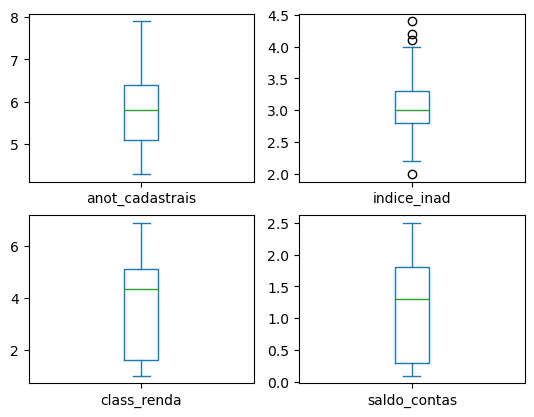

In [70]:

from matplotlib import pyplot

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

pyplot.show()

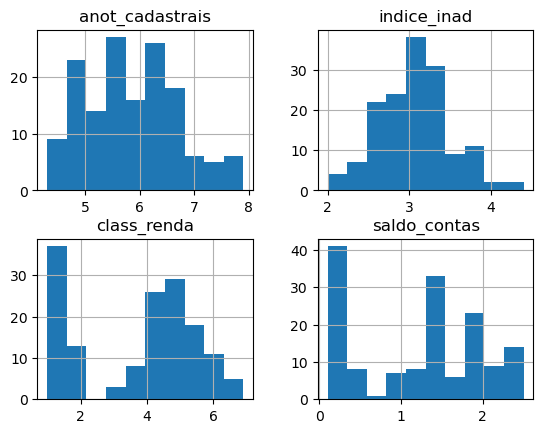

In [71]:
#cria um gráfico conhecido como histohrama
df.hist()
pyplot.show()


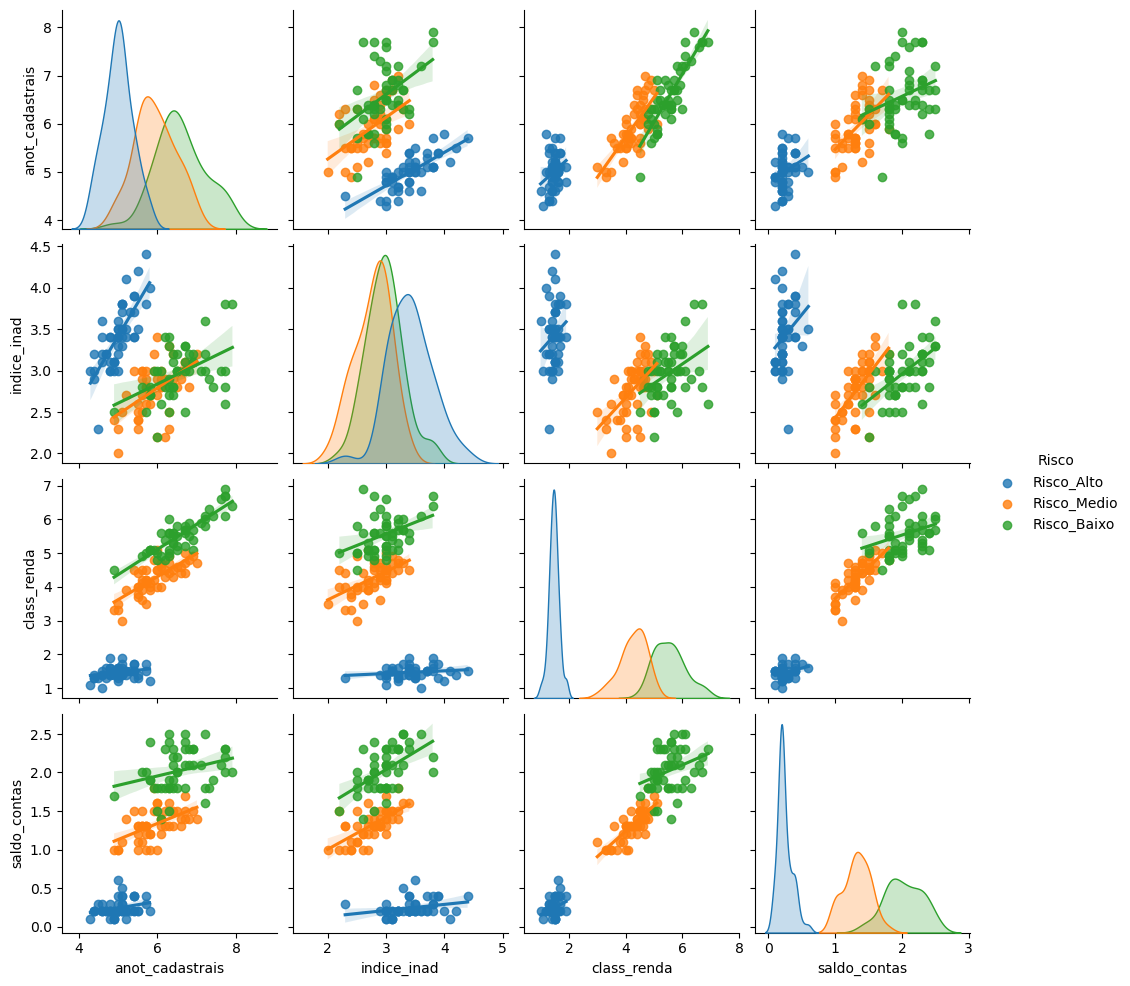

In [72]:
# Criação do Gráfico de dispersão 

sns.pairplot(df, hue='Risco', kind="reg") # kind=reg é a reta de regressão

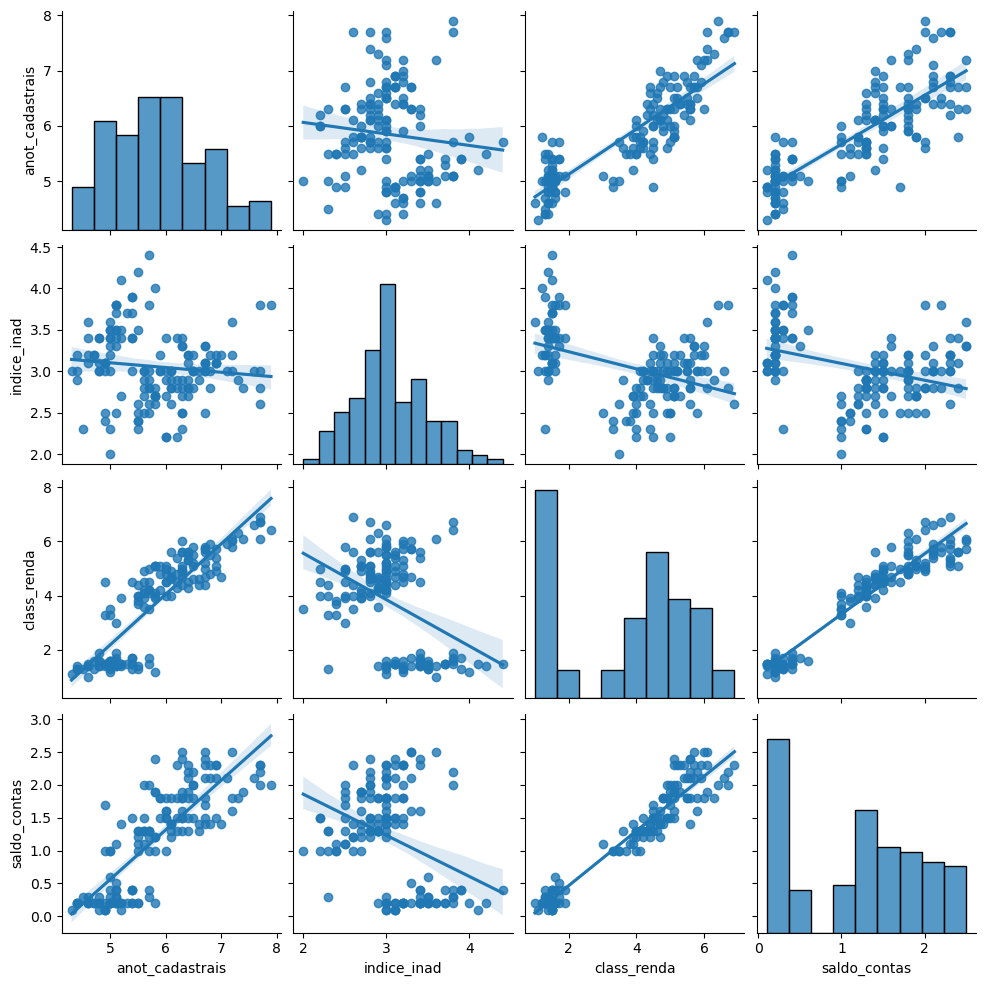

In [73]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(df,kind="reg")

#  Pré-Processamento dos Dados

In [74]:
# Separando as Variáveis de Entrada e Saída do Modelo

X = df.iloc[:,:-1].values  #variáveis independentes
y = df.iloc[:,-1].values  #Target/labe/class/vairável dependente

### Separando os dados entre Treino e Teste

In [75]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 14) 

In [76]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [77]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train) #evitar data leakge 

X_test = sc.transform(X_test) 



#  Construindo a Máquina Preditiva

### Criando um **baseline**


In [78]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

Modelo_01 = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]


Modelo_1 = Modelo_01.fit(X_train,y_train)


y_pred = Modelo_1.predict(X_test)



In [79]:

print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Medio'
 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Medio'
 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto']


#  Avaliando a Máquina Preditiva

In [80]:
# Calculando a Acurácia
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da Máquina =  96.66666666666667


In [81]:
#Usando a confusion matrix  e o classification report para avaliar

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

print(cm)
print(cr)

Acurácia da Máquina =  96.66666666666667
[[14  0  0]
 [ 0  6  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00        14
 Risco_Baixo       1.00      0.86      0.92         7
 Risco_Medio       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



### 2° Versão da Máquina Preditiva: Máquina Definitiva 

In [82]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC

Modelo_02 = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)




In [83]:
#Treinando a Máquina com o SVC

Modelo_2 = Modelo_02.fit(X_train,y_train)

In [84]:
#Fazendo novas previsões com os dados de teste

y_pred2 = Modelo_2.predict(X_test)


### Avaliando a máquina definitiva

In [85]:
# Calculando a Acurácia da Máquina Preditiva

print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred2))


Prediction Accuracy =  1.0


In [86]:
#Usando a confusion matrix e o classification report para avaliar a Máquina

from sklearn.metrics import confusion_matrix, classification_report

cm2 = confusion_matrix(y_test,y_pred2)
cr2 = classification_report(y_test, y_pred2)

In [87]:
# Imprimindo a Confusion Matrix e o Classification Report
print(cm2)
print(cr2)

[[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00        14
 Risco_Baixo       1.00      1.00      1.00         7
 Risco_Medio       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

